In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates
%matplotlib inline

In [28]:
data = pd.read_csv("./minute_weather.csv")

In [29]:
data.shape

(1587257, 13)

In [30]:
data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [31]:
data[data.isnull().any(axis = 1)]

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
34790,34790,2011-10-04 10:25:48,915.7,51.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,91.0
35929,35929,2011-10-05 05:24:48,915.2,49.64,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,92.0
36320,36320,2011-10-05 11:55:49,914.7,50.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,91.9
36321,36321,2011-10-05 11:56:49,914.7,50.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,91.9
36322,36322,2011-10-05 11:57:49,914.7,50.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,91.9
36323,36323,2011-10-05 11:58:49,914.6,50.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,91.9
36324,36324,2011-10-05 11:59:49,914.7,50.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,91.9
36325,36325,2011-10-05 12:00:49,914.6,50.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,91.9
36326,36326,2011-10-05 12:01:49,914.6,50.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,92.0


In [32]:
sample = data[(data["rowID"] %10) == 0]

In [33]:
sample.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [34]:
sample[sample["rain_accumulation"] == 0].shape

(157812, 13)

In [35]:
del sample["rain_accumulation"]
del sample["rain_duration"]



In [36]:
sample.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,57.4


In [44]:
sample = sample.dropna()

In [46]:
features = ["air_pressure", "air_temp", "avg_wind_direction", "avg_wind_speed", "max_wind_speed", "relative_humidity"]

In [47]:
select = sample[features]

In [48]:
select.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,1.6,60.5
10,912.3,62.24,144.0,1.2,1.8,38.5
20,912.2,63.32,100.0,2.0,2.5,58.3
30,912.2,62.60,91.0,2.0,2.4,57.9
40,912.2,64.04,81.0,2.6,2.9,57.4


In [53]:
X = StandardScaler().fit_transform(select)
type(X)

numpy.ndarray

In [63]:
X.shape

(158680, 6)

In [52]:
X

array([[-1.48456281,  0.24544455, -0.68385323, -0.76555283, -0.74440309,
         0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, -0.76555283, -0.66171726,
        -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, -0.37675365, -0.37231683,
         0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, -0.66835304, -0.70306017,
         0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, -0.71695294, -0.74440309,
        -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, -0.61975314, -0.62037434,
        -0.05711747]])

In [55]:
kmeans = KMeans(n_clusters = 12)
model = kmeans.fit(X)
print(model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [57]:
centers = model.cluster_centers_

In [58]:
centers

array([[ 1.23319371, -0.26746743, -1.13862785,  2.17469794,  2.29066966,
        -1.15299977],
       [-0.1051275 ,  0.86994356, -1.2776241 , -0.64070669, -0.65251264,
        -0.69085262],
       [-0.21642833,  0.66875579,  0.36072796,  0.73779905,  0.67952689,
        -0.2053767 ],
       [-1.19180837, -1.09284417,  0.26186448, -0.35879226, -0.34979734,
         1.39762432],
       [-1.30251052, -0.83112906,  0.44097698,  2.0229301 ,  1.98923887,
         0.87249465],
       [ 0.94588219,  0.06909507,  0.78755243, -0.57663476, -0.56403352,
        -0.76142335],
       [-0.09971774,  1.21327413,  1.13800885, -0.60872411, -0.57595717,
        -0.76032934],
       [-0.66191853,  0.33096102,  0.1372786 , -0.54905076, -0.56206725,
         0.04304943],
       [ 0.46146271, -0.99595638,  0.90726365, -0.54366601, -0.51901564,
         1.12899622],
       [-0.38674812, -1.20534662,  0.37242973,  0.73223769,  0.70358788,
         1.27141068],
       [ 0.28115109, -0.79450399, -1.18557294, -0.

In [59]:
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append("prediction")
    
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    
    P = pd.DataFrame(Z, columns = colNames)
    P["prediction"] = P["prediction"].astype(int)
    return P

In [73]:
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [74]:
P = pd_centers(features, centers)

In [75]:
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_speed,relative_humidity,prediction
0,1.233194,-0.267467,-1.138628,2.174698,2.290670,-1.153000,0
1,-0.105128,0.869944,-1.277624,-0.640707,-0.652513,-0.690853,1
2,-0.216428,0.668756,0.360728,0.737799,0.679527,-0.205377,2
3,-1.191808,-1.092844,0.261864,-0.358792,-0.349797,1.397624,3
4,-1.302511,-0.831129,0.440977,2.022930,1.989239,0.872495,4
5,0.945882,0.069095,0.787552,-0.576635,-0.564034,-0.761423,5
6,-0.099718,1.213274,1.138009,-0.608724,-0.575957,-0.760329,6
7,-0.661919,0.330961,0.137279,-0.549051,-0.562067,0.043049,7
8,0.461463,-0.995956,0.907264,-0.543666,-0.519016,1.128996,8
9,-0.386748,-1.205347,0.372430,0.732238,0.703588,1.271411,9


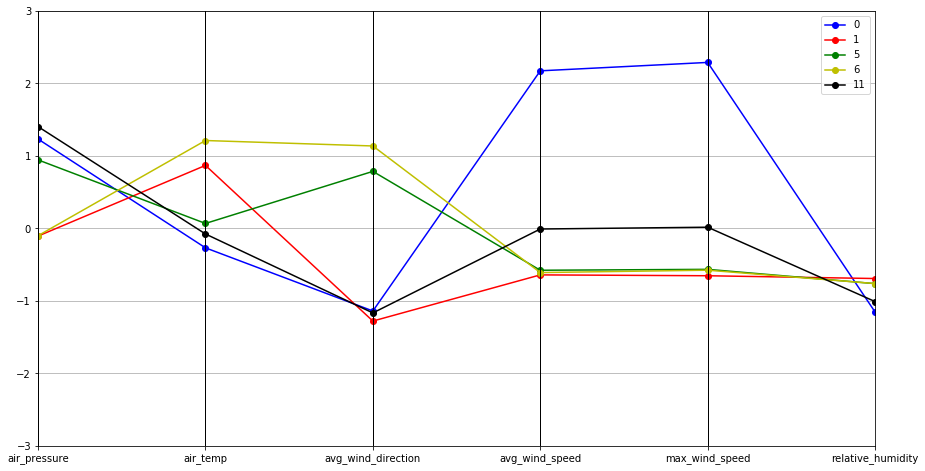

In [82]:
parallel_plot(P[P['relative_humidity'] < -0.5])

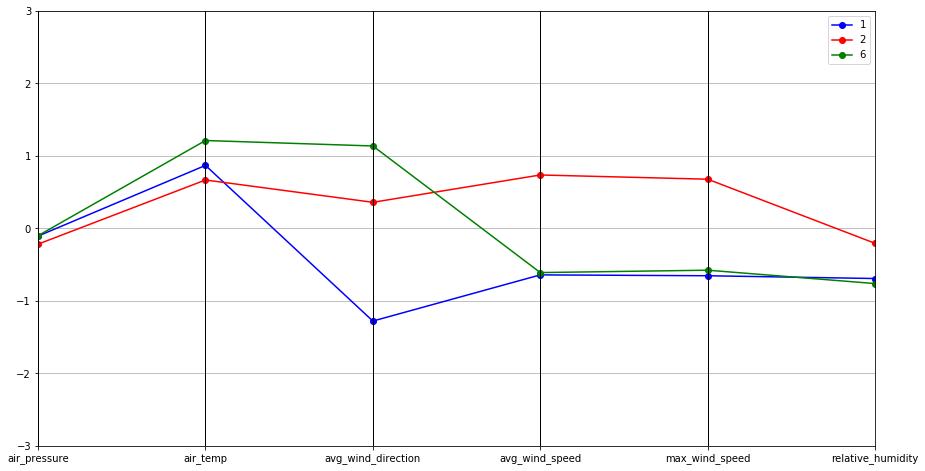

In [83]:
parallel_plot(P[P['air_temp'] > 0.5])

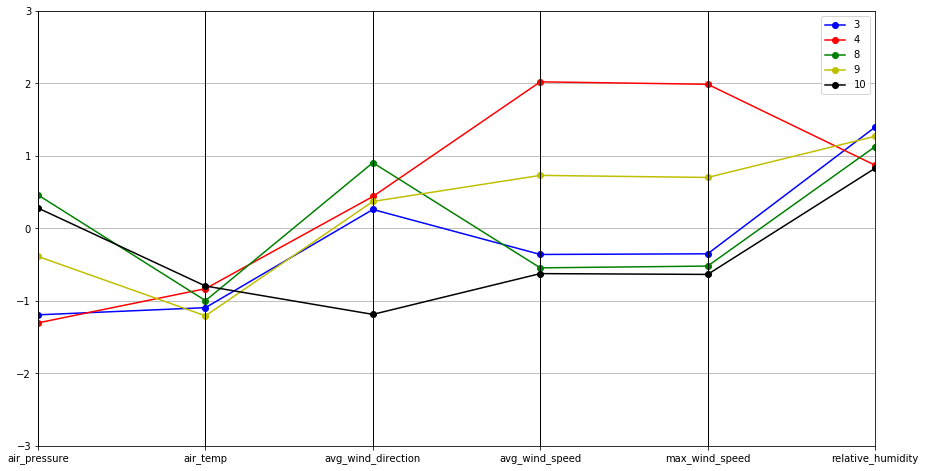

In [80]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])